In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import xgboost as xgb
import lightgbm as lgb
import missingno as msno
import seaborn as sns

seed = 2023

In [4]:
# Load data
df = pd.read_csv("Assignment_data.csv")
df = df.iloc[:,1:]
df.head()

,loan_condition,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,all_util,total_rev_hi_lim,inq_fi,inq_last_12m,avg_cur_bal,mths_since_recent_inq,percent_bc_gt_75,total_bal_ex_mort,total_bc_limit,disbursement_method
0,Good Loan,14900,14900,36 months,20.39,556.71,Dd4,D4,Regional Revenue Manager,1 year,...,77.0,66900.0,0.0,2.0,16731.0,4.0,83.3,78737.0,48300.0,Cash
1,Good Loan,32000,32000,36 months,9.43,1024.01,Bb2,B1,Nurse Practitioner,2 years,...,59.0,43400.0,0.0,1.0,41250.0,10.0,33.3,105297.0,36600.0,Cash
2,Good Loan,10000,10000,36 months,6.08,304.59,Aa1,A2,Manicures,10+ years,...,41.0,56600.0,0.0,4.0,6762.0,2.0,9.1,39197.0,48000.0,Cash
3,Bad Loan,12000,12000,36 months,13.99,410.08,Cc3,C3,Claims Specialist,1 year,...,69.0,19300.0,2.0,1.0,2743.0,12.0,50.0,41152.0,8500.0,Cash
4,Good Loan,7000,7000,36 months,19.22,257.38,Dd4,D4,Security Officer,10+ years,...,NaN,15700.0,NaN,NaN,9558.0,1.0,50.0,21020.0,11400.0,Cash


In [5]:
df.shape

(2147635, 48)

In [6]:
#EDA

In [7]:
df.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,inq_last_6mths,mths_since_last_record,open_acc,total_acc,out_prncp,...,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,inq_last_12m,avg_cur_bal,mths_since_recent_inq,percent_bc_gt_75,total_bal_ex_mort,total_bc_limit
count,2.147635e+06,2.147635e+06,2.147635e+06,2.147635e+06,2.147631e+06,2.147606e+06,341234.000000,2.147607e+06,2.147607e+06,2.147635e+06,...,1.324722e+06,1.324515e+06,2.080814e+06,1.324722e+06,1.324721e+06,2.080751e+06,1.867025e+06,2.075949e+06,2.100083e+06,2.100083e+06
mean,1.504747e+04,1.504220e+04,1.309219e+01,4.457965e+02,7.799118e+04,5.767618e-01,72.304193,1.161218e+01,2.416199e+01,4.445928e+03,...,5.805166e+03,5.703325e+01,3.456883e+04,1.013093e+00,2.036708e+00,1.354887e+04,7.024496e+00,4.243188e+01,5.101805e+04,2.319077e+04
std,9.190632e+03,9.188811e+03,4.830920e+00,2.671612e+02,1.141631e+05,8.857145e-01,26.470623,5.640380e+00,1.198734e+01,7.547765e+03,...,5.685343e+03,2.090047e+01,3.678512e+04,1.490111e+00,2.382157e+00,1.648146e+04,5.965391e+00,3.621469e+01,4.987874e+04,2.300289e+04
min,5.000000e+02,5.000000e+02,5.310000e+00,7.610000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,9.490000e+00,2.516200e+02,4.600000e+04,0.000000e+00,55.000000,8.000000e+00,1.500000e+01,0.000000e+00,...,2.285000e+03,4.300000e+01,1.470000e+04,0.000000e+00,0.000000e+00,3.081000e+03,2.000000e+00,0.000000e+00,2.089700e+04,8.300000e+03
50%,1.290000e+04,1.287500e+04,1.262000e+01,3.779500e+02,6.500000e+04,0.000000e+00,74.000000,1.100000e+01,2.200000e+01,0.000000e+00,...,4.412000e+03,5.800000e+01,2.540000e+04,1.000000e+00,1.000000e+00,7.338000e+03,5.000000e+00,3.750000e+01,3.786500e+04,1.630000e+04
75%,2.000000e+04,2.000000e+04,1.599000e+01,5.933100e+02,9.300000e+04,1.000000e+00,92.000000,1.400000e+01,3.100000e+01,6.710650e+03,...,7.598000e+03,7.200000e+01,4.320000e+04,1.000000e+00,3.000000e+00,1.878300e+04,1.100000e+01,7.140000e+01,6.435000e+04,3.030000e+04
max,4.000000e+04,4.000000e+04,3.099000e+01,1.719830e+03,1.100000e+08,3.300000e+01,129.000000,9.700000e+01,1.760000e+02,4.000000e+04,...,1.170668e+06,2.390000e+02,9.999999e+06,4.800000e+01,6.700000e+01,9.580840e+05,2.500000e+01,1.000000e+02,3.408095e+06,1.569000e+06


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147635 entries, 0 to 2147634
Data columns (total 48 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   loan_condition          object 
 1   loan_amnt               int64  
 2   funded_amnt             int64  
 3   term                    object 
 4   int_rate                float64
 5   installment             float64
 6   grade                   object 
 7   sub_grade               object 
 8   emp_title               object 
 9   emp_length              object 
 10  home_ownership          object 
 11  annual_inc              float64
 12  verification_status     object 
 13  issue_d                 object 
 14  loan_status             object 
 15  pymnt_plan              object 
 16  purpose                 object 
 17  title                   object 
 18  addr_state              object 
 19  inq_last_6mths          float64
 20  mths_since_last_record  float64
 21  open_acc                float64


Percentage of missing values for each column:
annual_inc_joint          94.655330
mths_since_last_record    84.111173
next_pymnt_d              57.667667
all_util                  38.326811
inq_last_12m              38.317219
open_acc_6m               38.317219
max_bal_bc                38.317172
inq_fi                    38.317172
mths_since_recent_inq     13.066001
emp_title                  7.388639
emp_length                 6.501198
percent_bc_gt_75           3.337904
avg_cur_bal                3.114309
total_rev_hi_lim           3.111376
tot_cur_bal                3.111376
total_bal_ex_mort          2.214157
total_bc_limit             2.214157
title                      1.033509
last_pymnt_d               0.107514
last_credit_pull_d         0.003120
inq_last_6mths             0.001350
total_acc                  0.001304
open_acc                   0.001304
annual_inc                 0.000186
dtype: float64


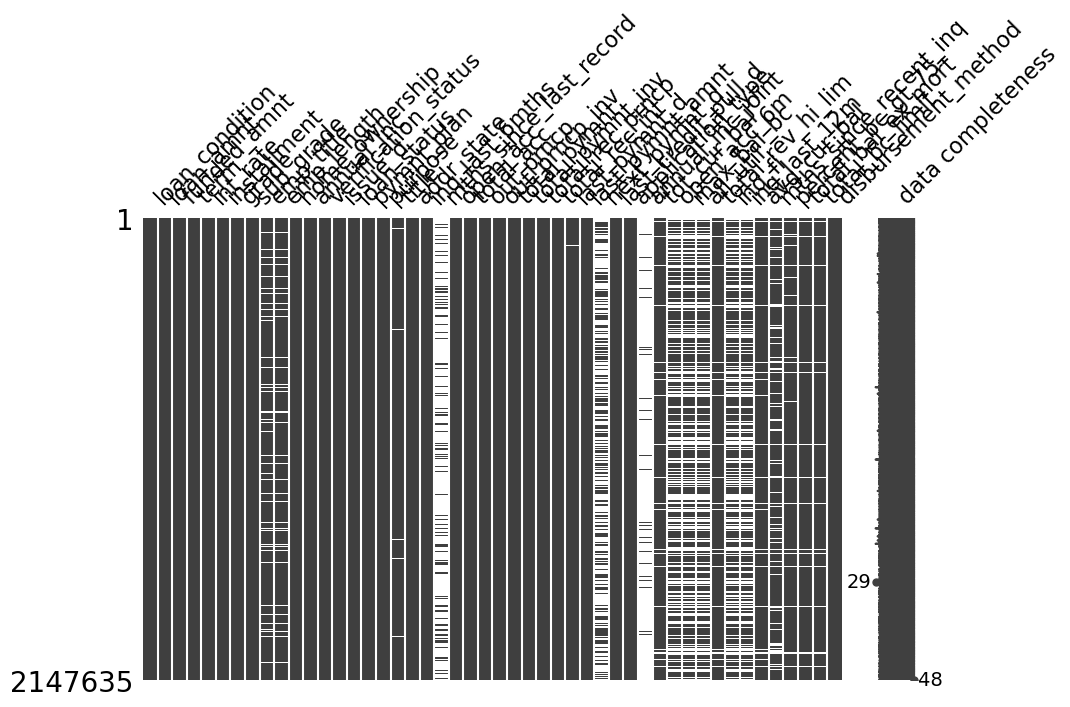

In [9]:
import missingno as msno

# Examine the extent of missing data in the dataset
msno.matrix(df, figsize=(10, 6), sparkline=True, labels=True)

# Display the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

if not missing_percentage.empty:
    print("\nPercentage of missing values for each column:")
    print(missing_percentage)
else:
    print("\nNo missing values in the dataset.")

In [10]:
# Convert the list of categorical variables to text for clarity and error prevention

categorical_list = [3,6,7,8,9,10,12,14,15,16,17,33,47,0]

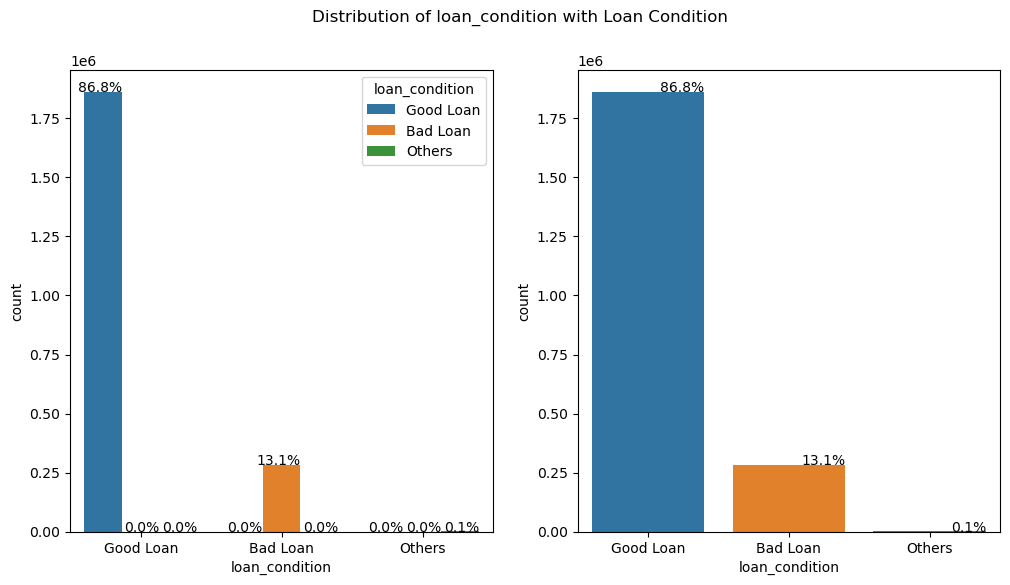

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Categorical EDA Function
def categorical_EDA(data, feature):
    """
    Visualizes the distribution of a categorical feature and its relationship with the target variable.

    Parameters:
    - data: DataFrame, the dataset containing the feature and target variable.
    - feature: str, the categorical feature to be explored.

    Returns:
    - None, but plots two subplots for better insight.
    """

    # Create subplots
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Plot count distribution with loan_condition hue
    sns.countplot(x=feature, hue='loan_condition', data=data, ax=ax[0], order=data[feature].value_counts().iloc[:14].index)

    # Plot count distribution without loan_condition hue
    sns.countplot(x=feature, data=data, ax=ax[1], order=data[feature].value_counts().iloc[:14].index)

    # Set title
    fig.suptitle(f'Distribution of {feature} with Loan Condition')

    # Calculate percentage labels and annotate
    total = float(len(data))
    for i in range(2):
        for p in ax[i].patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax[i].annotate(percentage, (x, y), ha="right")

    # Display the plot
    plt.show()

categorical_EDA(df, 'loan_condition')

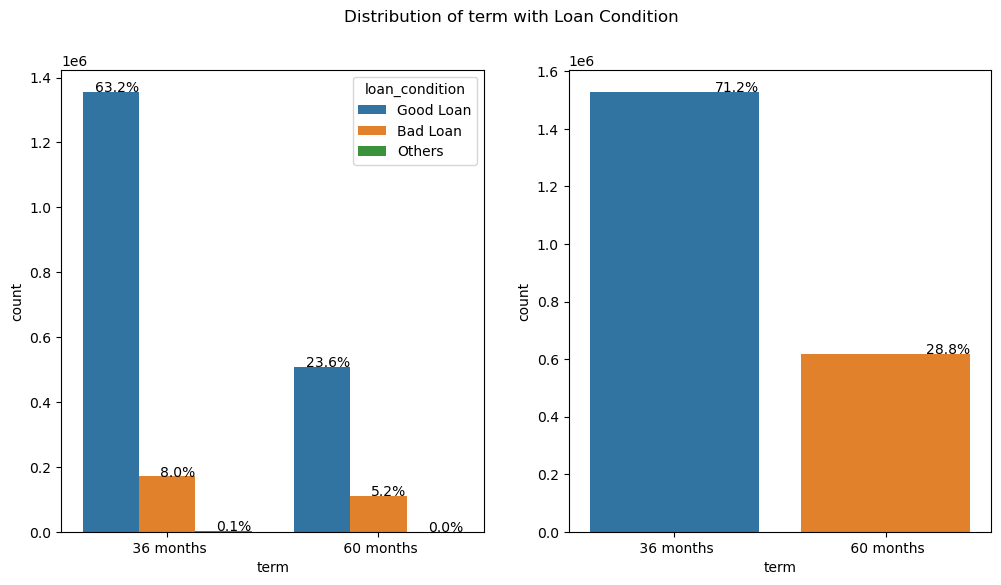

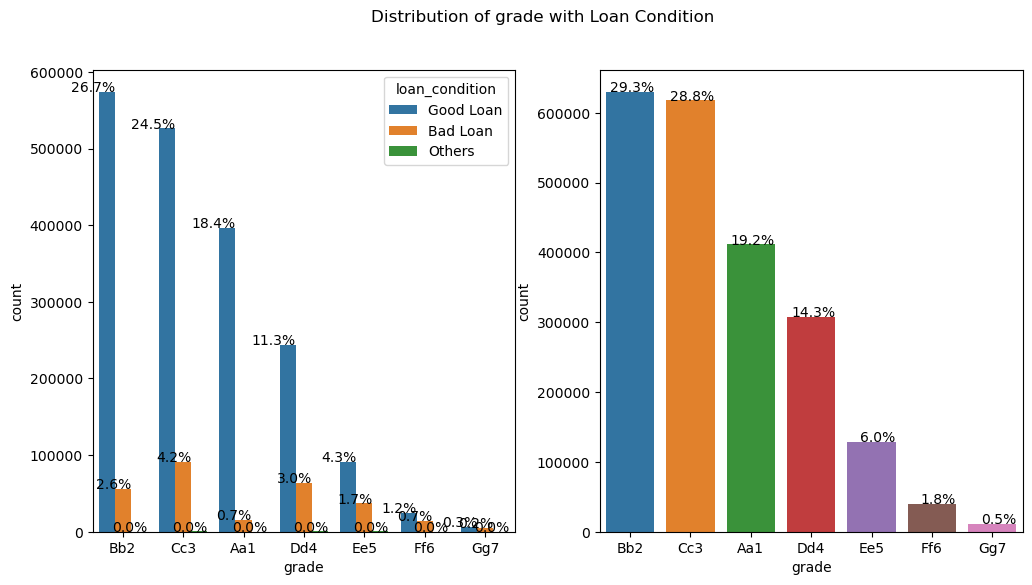

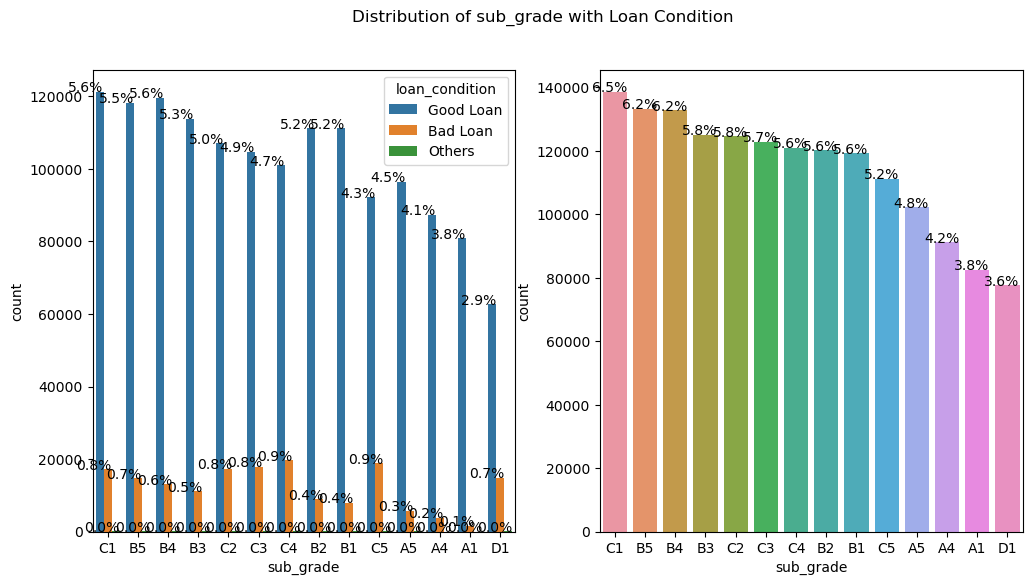

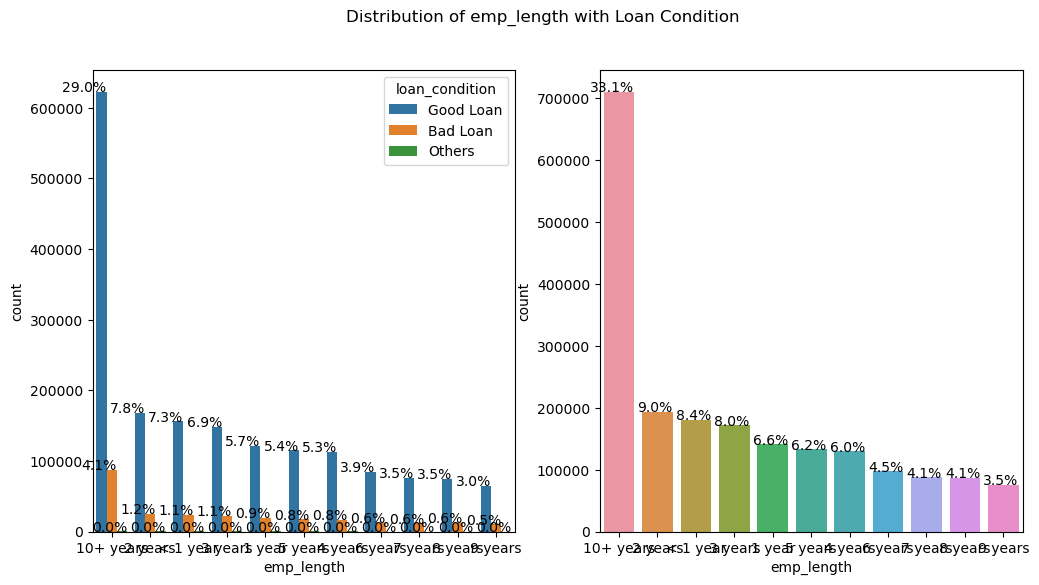

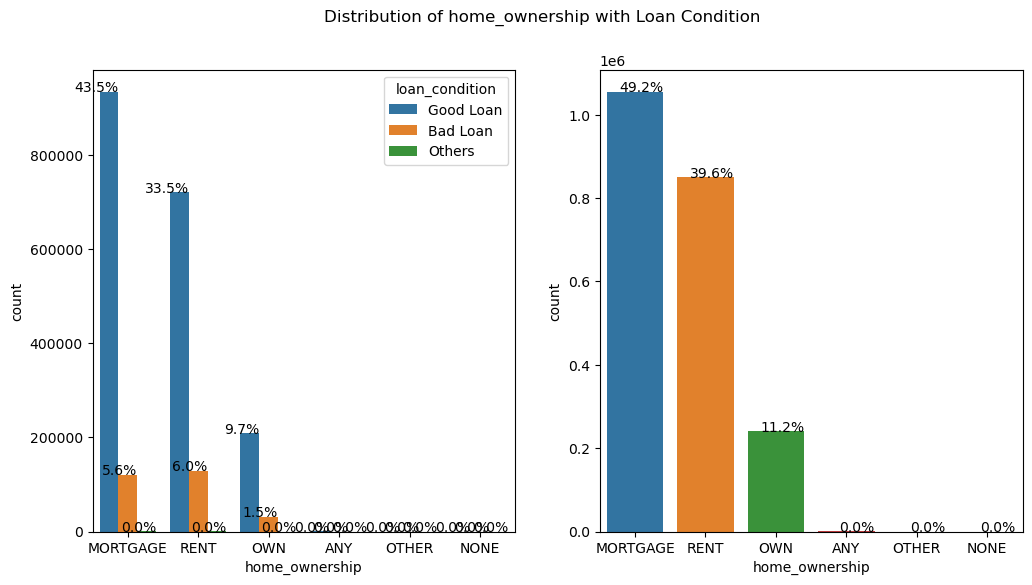

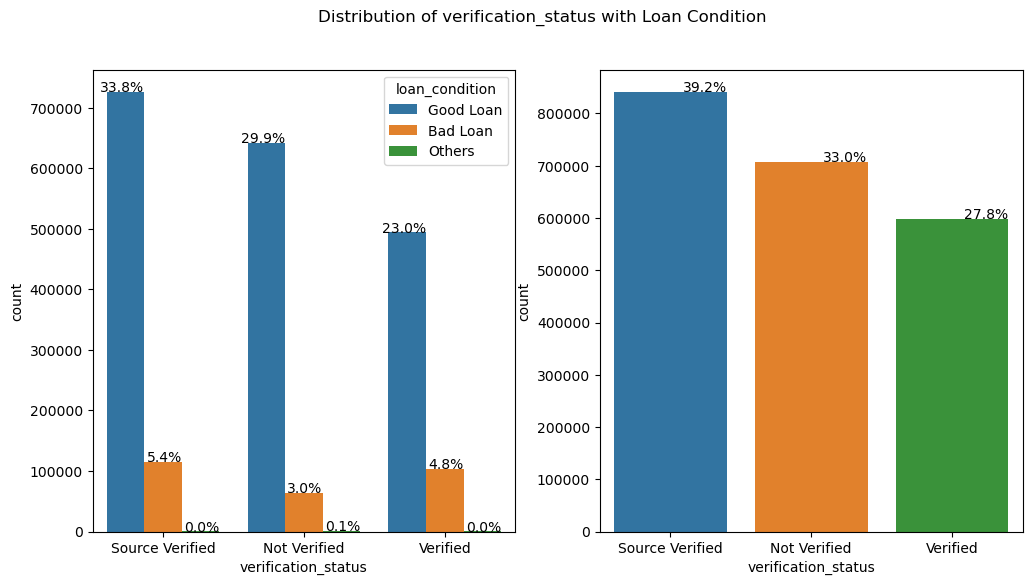

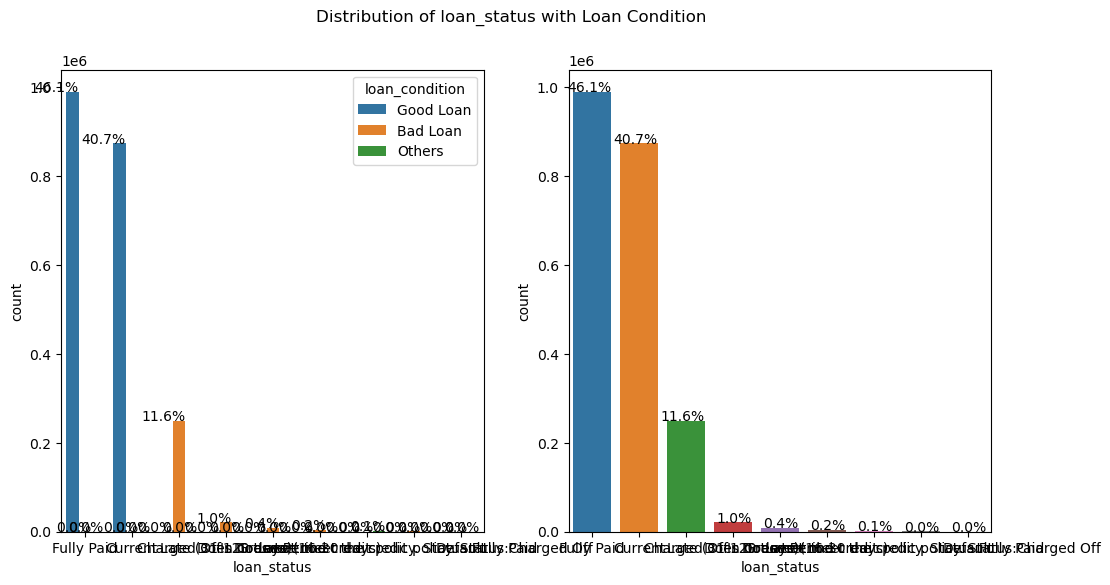

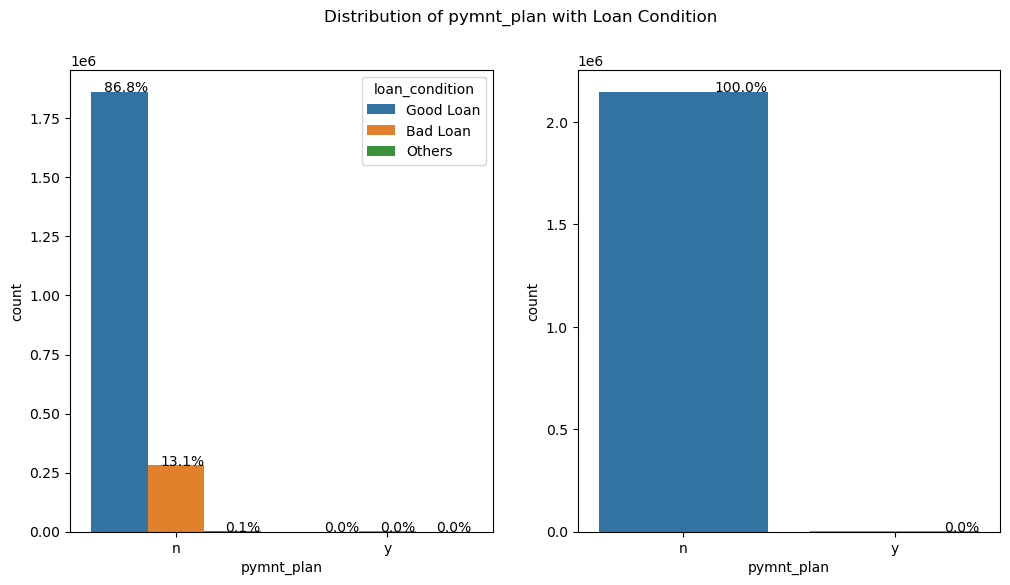

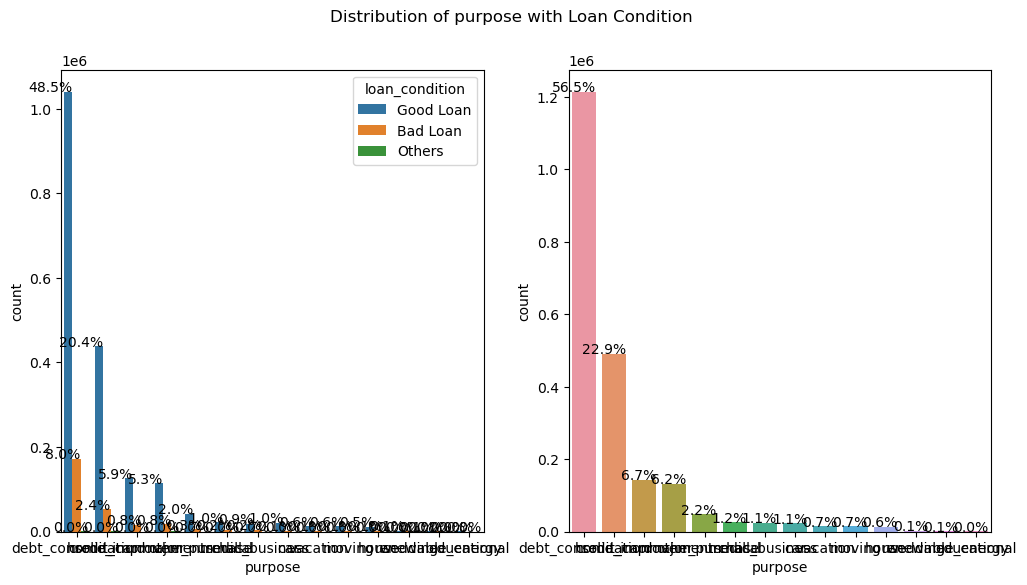

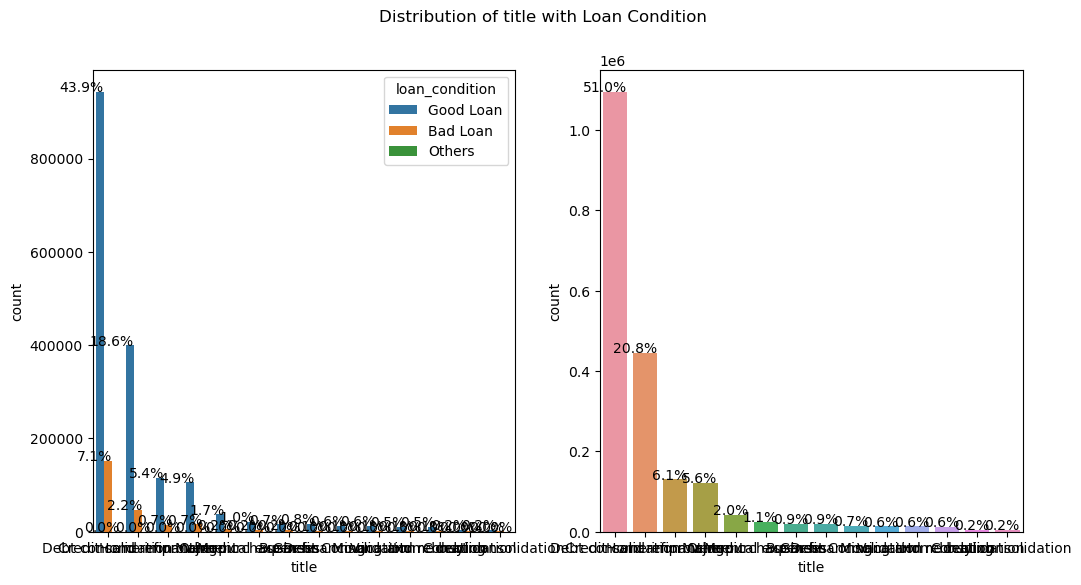

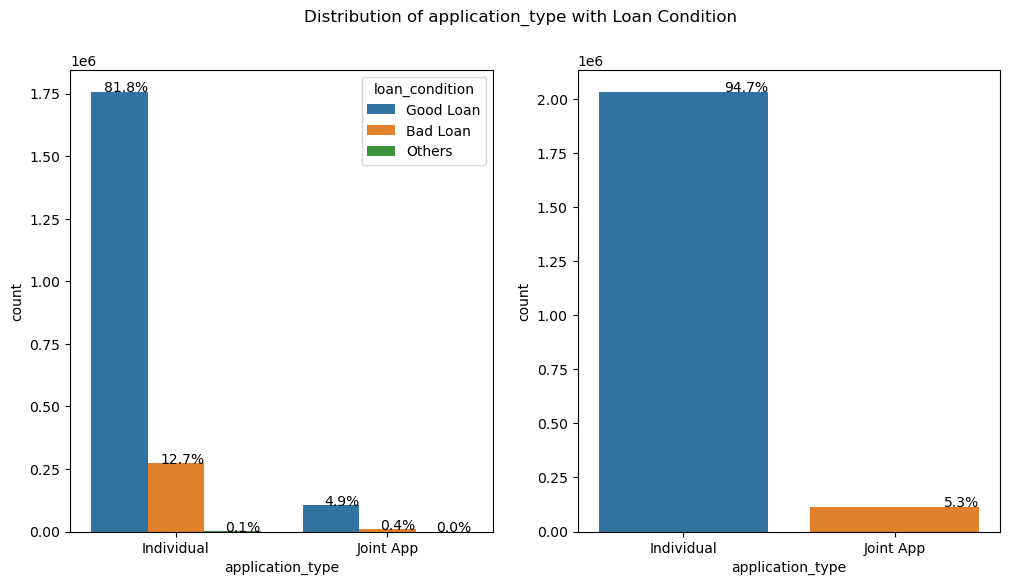

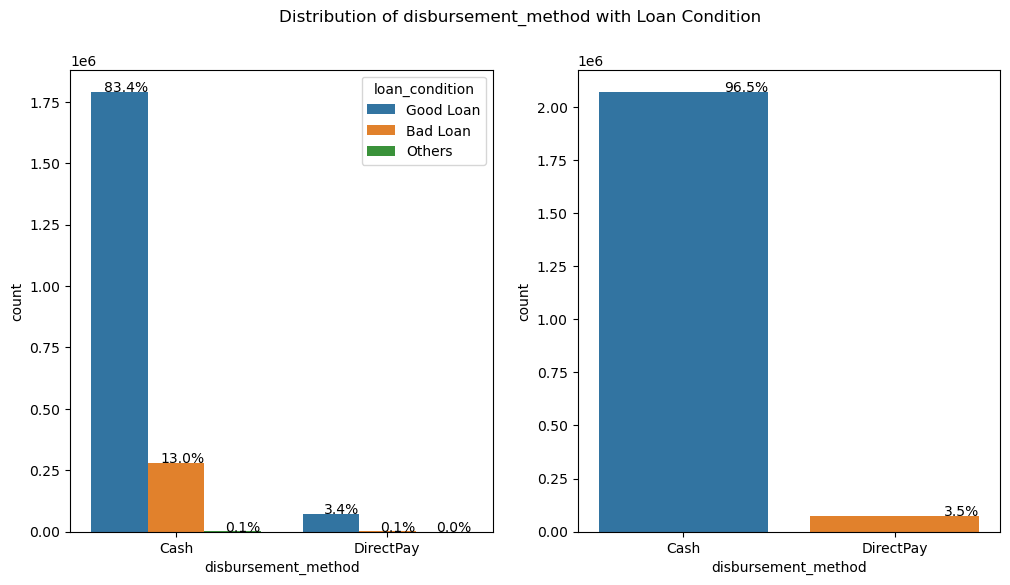

In [12]:
# List of categorical features to analyze
categorical_features = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
                         'verification_status', 'loan_status', 'pymnt_plan', 'purpose',
                         'title', 'application_type', 'disbursement_method']

for feature in categorical_features:
    categorical_EDA(df, feature)

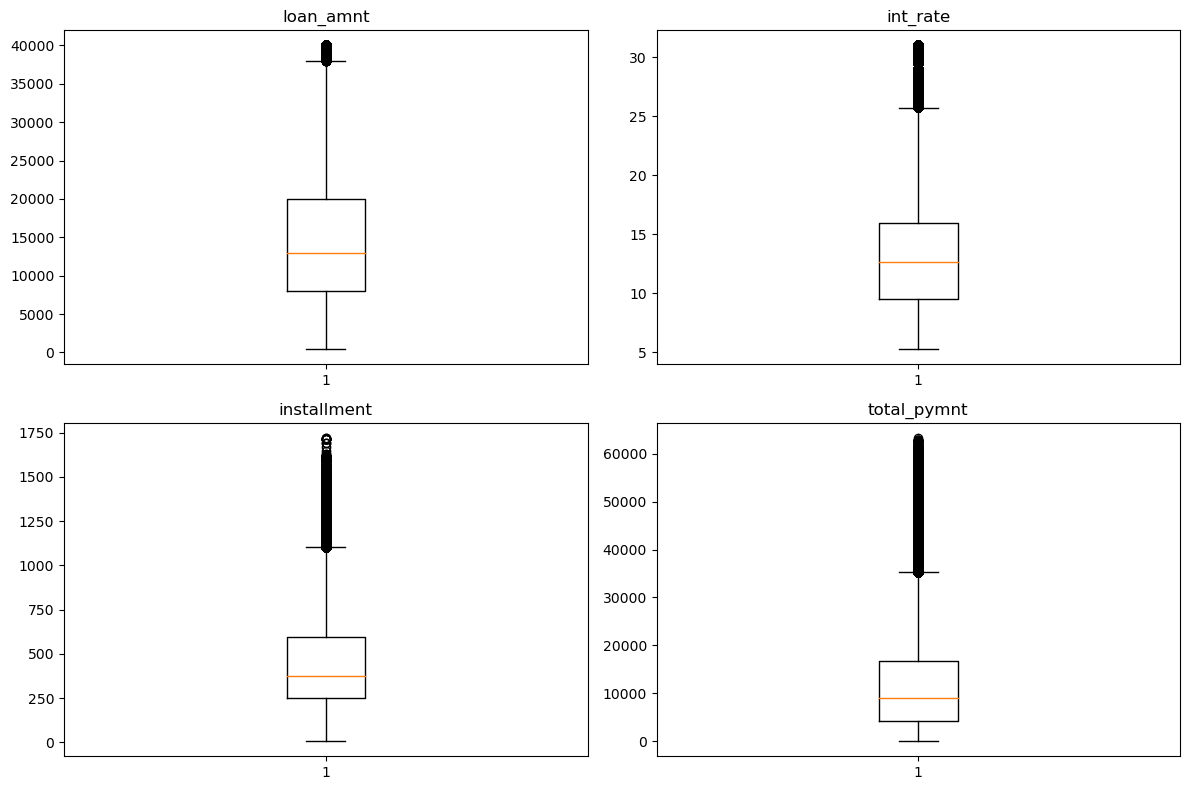

In [13]:
# EDA on Ordinal and Quantitative Variables

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# List of quantitative features to analyze
quantitative_features = ['loan_amnt', 'int_rate', 'installment', 'total_pymnt']

# Loop through each quantitative feature and generate boxplots
for i, feature in enumerate(quantitative_features):
    row, col = divmod(i, 2)
    axs[row, col].boxplot(df[feature])
    axs[row, col].set_title(feature)

plt.tight_layout()
plt.show()

In [14]:
# Data Pre-processing

In [15]:
# Create a new column 'loan_condition2' and copy values from 'loan_condition'
df['loan_condition2'] = df['loan_condition']

# Convert 'loan_condition2' column to dummy variables
df = pd.get_dummies(df, columns=['loan_condition2'])

In [16]:
# Convert 'issue_d' to datetime format with specified format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')

# Extract year and month from 'issue_d' and create new columns
df['year'] = pd.DatetimeIndex(df['issue_d']).year
df['month'] = pd.DatetimeIndex(df['issue_d']).month

In [17]:
# Remove records with 'Others' in loan_condition
df = df[df['loan_condition'] != 'Others']

In [18]:
# Questions 1 (4’):
# Q1a

# • From risk perspective, can you assess if the bank expands this program at adequate
# pace, or too slow/fast? Show insights at individual level and at portfolio/program
# level to support your assessment

In [19]:
# Plotting total nos of loans and total value of loans
df_loangroup = df.groupby('year').agg({'loan_amnt': ['sum', 'count']}).reset_index()
df_loangroup

year   loan_amnt        
                 sum   count
0   2007     3070375     343
1   2008    15716750    1715
2   2009    45476700    4619
3   2010   118239525   11189
4   2011   249261325   20663
5   2012   684098575   50761
6   2013  1882574375  128015
7   2014  3327339675  223785
8   2015  6099935100  400229
9   2016  6083411000  412764
10  2017  6251108450  421214
11  2018  7539581400  470449

In [20]:
df_loangroup_year = df_loangroup['loan_amnt'].copy()
df_loangroup_year['year'] = df_loangroup['year']
df_loangroup_year['avg_loan_amt'] = df_loangroup_year['sum'] / df_loangroup_year['count']
df_loangroup_year

,sum,count,year,avg_loan_amt
0,3070375,343,2007,8951.530612
1,15716750,1715,2008,9164.285714
2,45476700,4619,2009,9845.572635
3,118239525,11189,2010,10567.479221
4,249261325,20663,2011,12063.172095
5,684098575,50761,2012,13476.853785
6,1882574375,128015,2013,14705.888958
7,3327339675,223785,2014,14868.466050
8,6099935100,400229,2015,15241.112213
9,6083411000,412764,2016,14738.230563


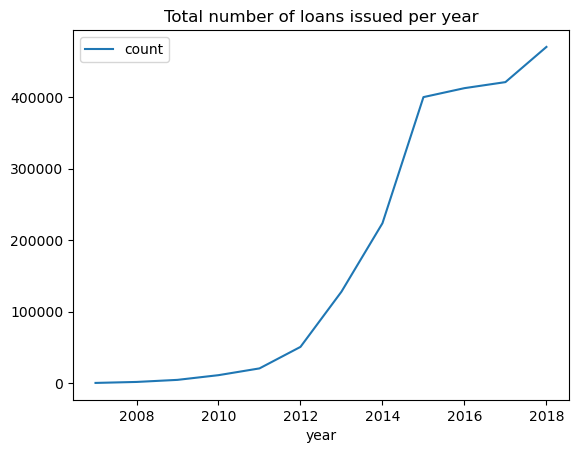

In [21]:
df_loangroup_year.plot(x='year', y='count', title='Total number of loans issued per year')
plt.show()

In [22]:
# The bank substantially increased the volume of issued loans 
# from 2012 to 2014 and sustained this expansion from 2015 onward

In [23]:
#Q1 b
# You are asked to evaluate if those loans are priced adequately, 
# and evaluate how price evolves across time. 

# The bank management needs to determine if it is aligned
# with overall pricing strategy, i.e. pricing with risk in consideration. 

# Provide assessment and support with insights

<Axes: title={'center': 'Total Loan Amount Issued per Year'}, xlabel='Year', ylabel='Total Loan Amount'>

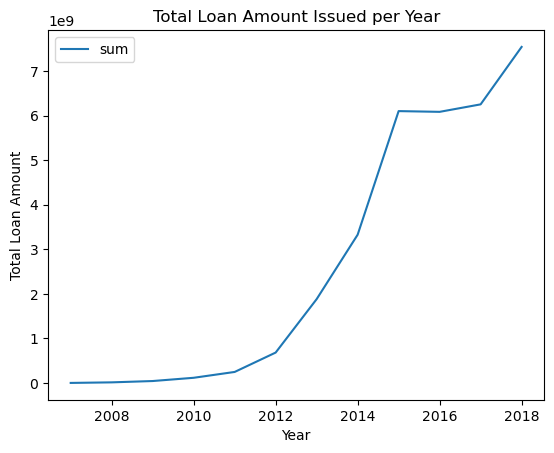

In [24]:
df_loangroup_year.plot(x='year', y='sum', xlabel='Year', ylabel='Total Loan Amount', title='Total Loan Amount Issued per Year')

<Axes: title={'center': 'Average Loan Amount Issued per Year'}, xlabel='Year', ylabel='Average Loan Amount'>

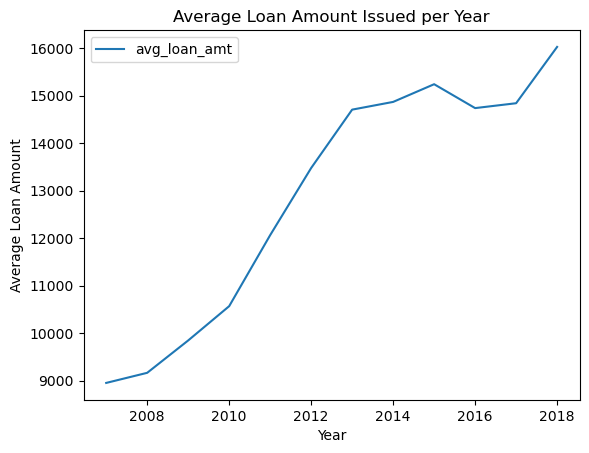

In [25]:
df_loangroup_year.plot(x='year', y='avg_loan_amt', xlabel='Year', ylabel='Average Loan Amount', title='Average Loan Amount Issued per Year')

In [26]:
# From 2013 onward, the average loan amount has remained stable at approximately $15,000

In [27]:
# Nos of loans issued by grade
df_grade = df.groupby(['grade', 'year']).size().reset_index(name='count')
df_grade

,grade,year,count
0,Aa1,2007,57
1,Aa1,2008,279
2,Aa1,2009,1129
3,Aa1,2010,2665
4,Aa1,2011,5456
...,...,...,...
79,Gg7,2014,1602
80,Gg7,2015,2052
81,Gg7,2016,2412
82,Gg7,2017,3265


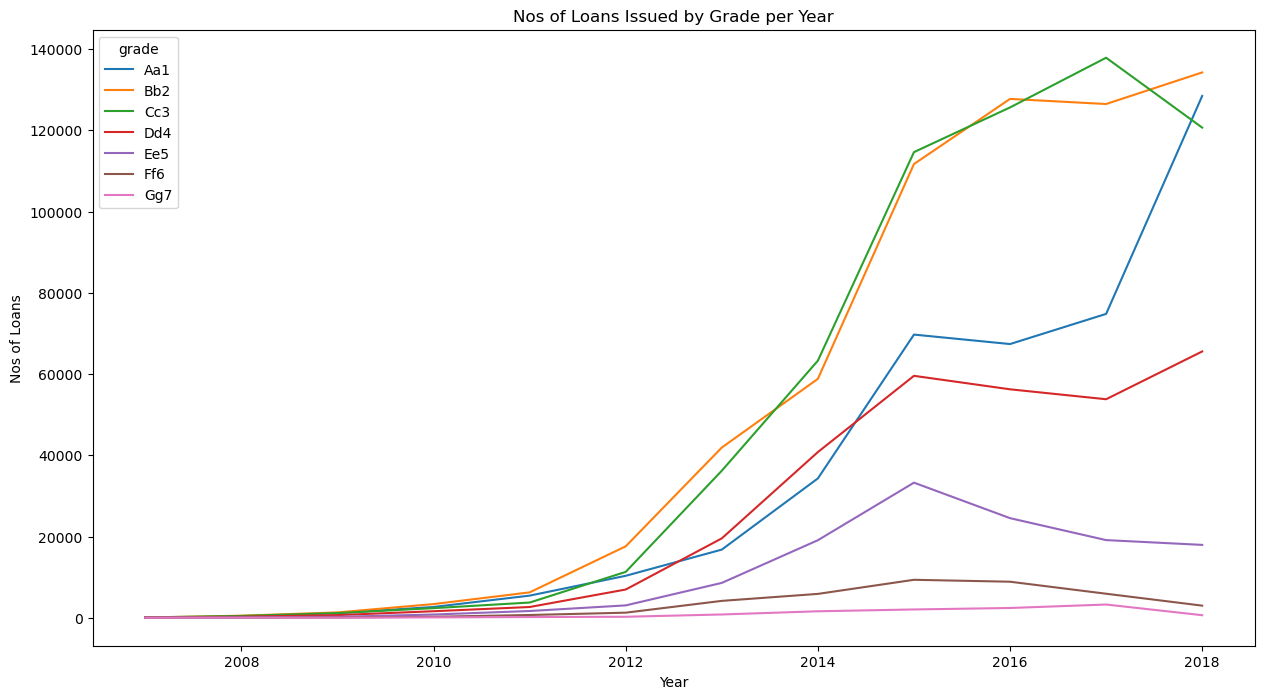

In [28]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_grade, x='year', y='count', hue='grade')
plt.title('Nos of Loans Issued by Grade per Year')
plt.xlabel('Year')
plt.ylabel('Nos of Loans')
plt.show()

In [29]:
# The three primary loan grades, namely Aa1, Bb2, and Cc3, 
# exhibited a comparable growth trend from 2012 to 2015.

# However, starting in 2016, 
# the bank seems to have prioritized a more balanced risk profile, 
# concentrating its expansion efforts primarily on issuing Aa1 loans.

In [30]:
# Aggregate loan amounts by grade and year
df_grade2 = df.groupby(['grade', 'year'])['loan_amnt'].sum().reset_index()
df_grade2

,grade,year,loan_amnt
0,Aa1,2007,305050
1,Aa1,2008,1772150
2,Aa1,2009,8108650
3,Aa1,2010,23437650
4,Aa1,2011,49155200
...,...,...,...
79,Gg7,2014,31694600
80,Gg7,2015,41920450
81,Gg7,2016,46920650
82,Gg7,2017,68522875


Text(0.5, 1.0, 'Total Value of Loans by Grade per Year')

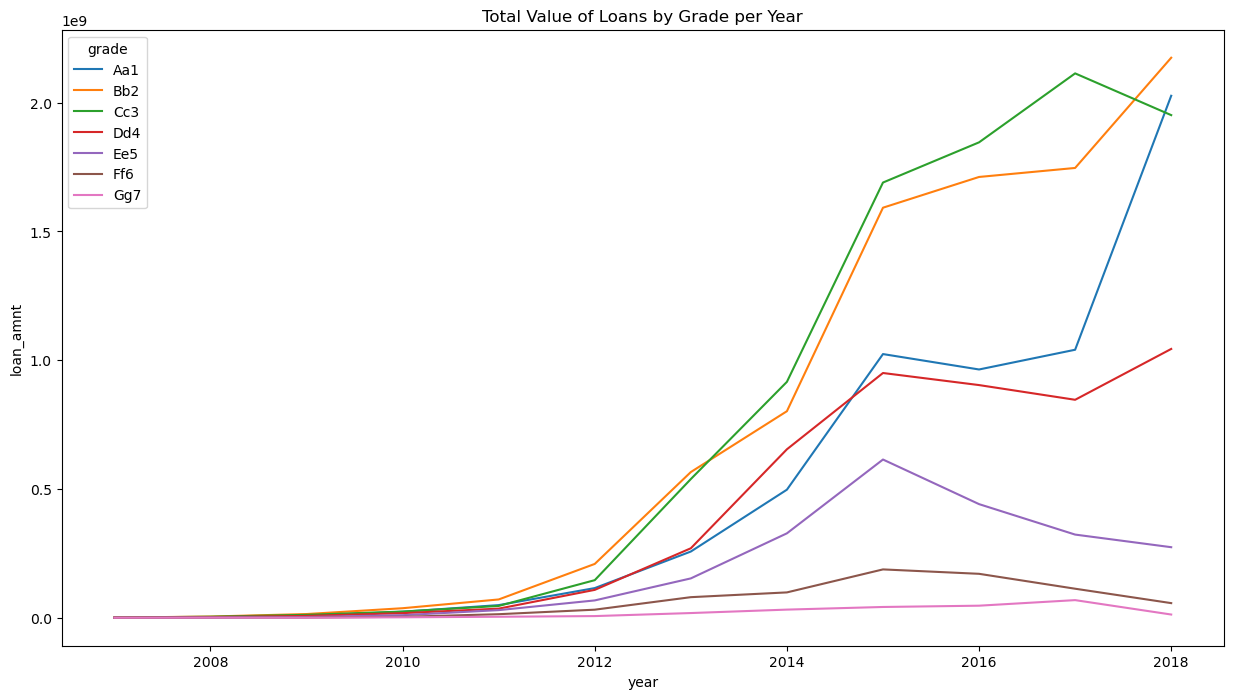

In [31]:
# Plotting the total value of loans by grade per year
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_grade2, x='year', y='loan_amnt', hue='grade')
plt.title('Total Value of Loans by Grade per Year')

In [32]:
# Counting the nos of loans issued by purpose
df_purpose = df.groupby(['year', 'purpose']).size().reset_index(name='count')
df_purpose

,year,purpose,count
0,2007,car,5
1,2007,credit_card,51
2,2007,debt_consolidation,109
3,2007,educational,15
4,2007,home_improvement,31
...,...,...,...
156,2018,other,33260
157,2018,renewable_energy,263
158,2018,small_business,4367
159,2018,vacation,3340


Text(0.5, 1.0, 'Nos of Loans by Purpose per Year')

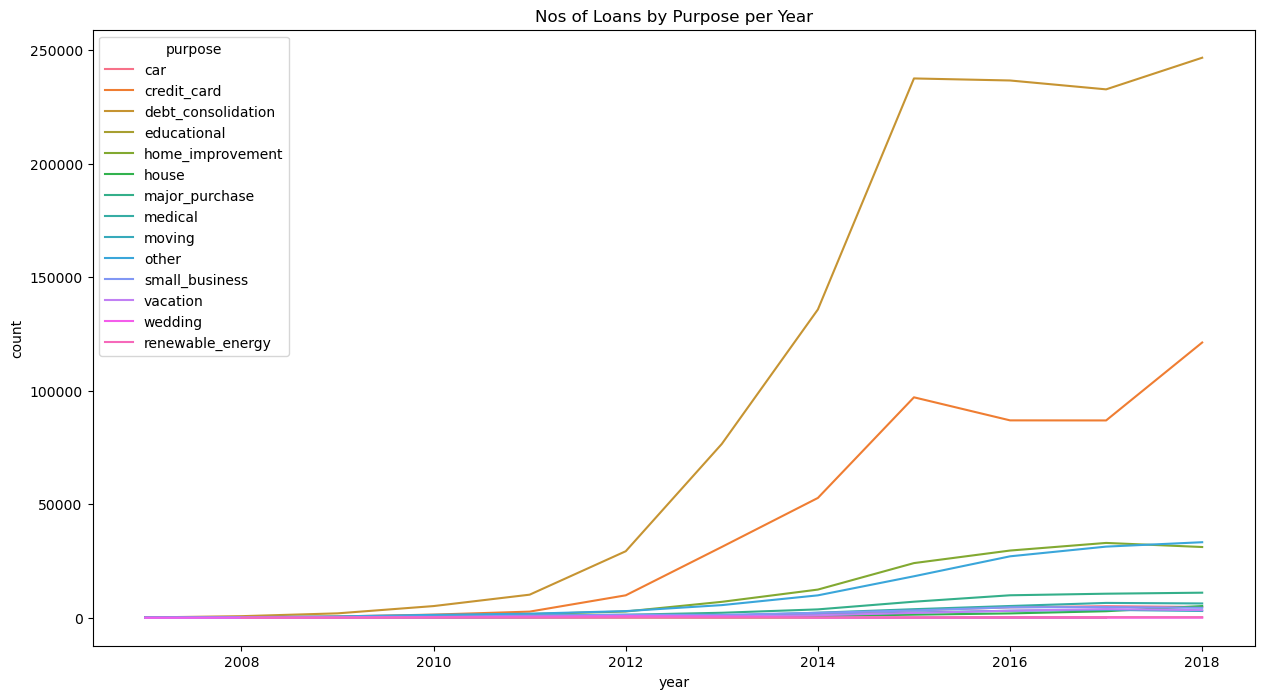

In [33]:
# Plotting the nos of loans by purpose per year
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_purpose, x='year', y='count', hue='purpose')
plt.title('Nos of Loans by Purpose per Year')

In [34]:
# The majority of the loans issued were for debt consolidation or credit card purposes

In [35]:
# What is the average interest rate by grade over time? 

# Are the interest rates differentiated based on grades?

In [36]:
# Calculate the average interest rate by grade over time
df_grade = df[['year', 'grade', 'int_rate']].groupby(['year', 'grade']).agg(['mean']).reset_index()

df_grade_plot = df_grade['int_rate']
df_grade_plot['year'] = df_grade['year']
df_grade_plot['grade'] = df_grade['grade']

df_grade_plot = df_grade_plot.rename(columns={'mean': 'avg_int_rate'})

/var/folders/zp/88jsstbd46v5r43183whptph0000gn/T/ipykernel_47690/1049705864.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grade_plot['year'] = df_grade['year']


In [68]:
df_grade_plot

,avg_int_rate,year,grade
0,7.732982,2007,Aa1
1,9.405692,2007,Bb2
2,10.852111,2007,Cc3
3,12.431400,2007,Dd4
4,14.105789,2007,Ee5
...,...,...,...
79,14.710906,2018,Cc3
80,19.488851,2018,Dd4
81,25.175917,2018,Ee5
82,29.483755,2018,Ff6


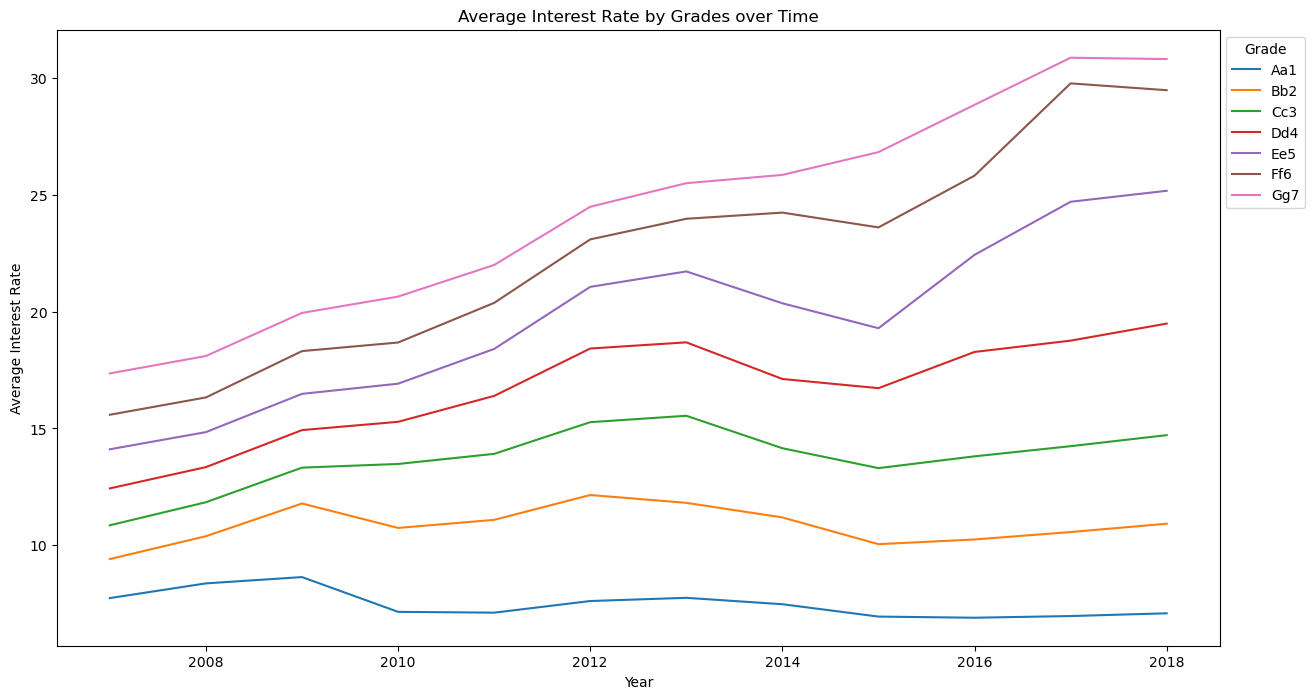

In [38]:
# Plotting average interest rate by grades over time
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_grade_plot, x='year', y='avg_int_rate', hue='grade')
plt.title('Average Interest Rate by Grades over Time')
plt.xlabel('Year')
plt.ylabel('Average Interest Rate')
plt.legend(title='Grade', loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()

In [39]:
# There is a gradual rise in interest rates across the majority of loan grades. 

# Aa1 grades, representing loans with the lowest risk, remain below 10%. 

# Conversely, Gg7 loans, considered the most risky, 
# experienced an almost twofold increase in their interest rates, 
# climbing from 17% in 2007 to over 30% in 2018. 

# The gap between loan grades remains consistent and 
# nearly evenly distributed across different grades and years.

In [40]:
# Questions 2 (4’):
# • How does the portfolio default look like across year?
# o Does it get better over year? If no, what are the possible reasons

# • Does the bank have the effective credit assessment method to grade them?
# Elaborate. If not, what are your suggestions

In [41]:
# Proportion of defaulting loans to total loans over time

In [42]:
# Create a pivot table to calculate the nos of bad loans and good loans over time
df_loan_status = pd.pivot_table(df, index=['year'], values=['loan_condition2_Bad Loan', 'loan_condition2_Good Loan'], aggfunc=np.sum)
df_loan_status

,loan_condition2_Bad Loan,loan_condition2_Good Loan
year,,
2007,151,192
2008,472,1243
2009,689,3930
2010,1670,9519
2011,3125,17538
2012,8222,42539
2013,19973,108042
2014,39603,184182
2015,74021,326208


In [43]:
# Calculate the total count and non-performing loan ratio using loan_status
df_loan_status['total_count'] = df_loan_status['loan_condition2_Bad Loan'] + df_loan_status['loan_condition2_Good Loan']
df_loan_status['Non-performing loan ratio'] = df_loan_status['loan_condition2_Bad Loan'] / df_loan_status['total_count']

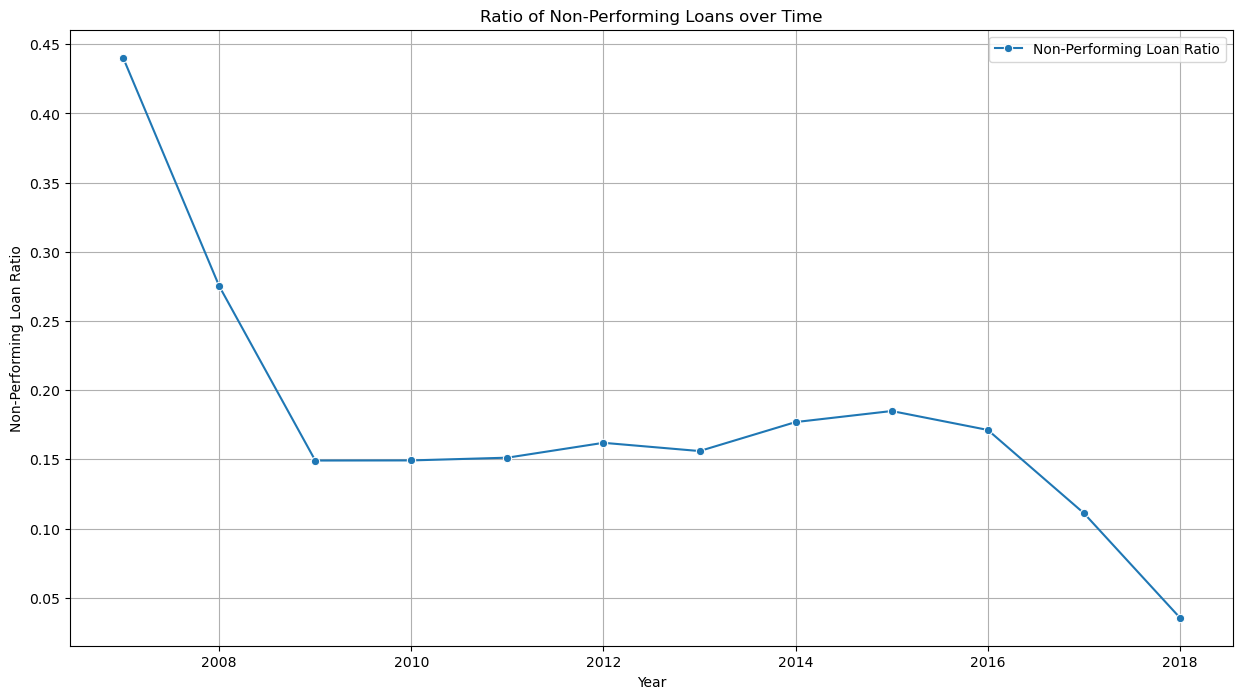

In [44]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_loan_status, x='year', y='Non-performing loan ratio', label='Non-Performing Loan Ratio', marker='o')
plt.title('Ratio of Non-Performing Loans over Time')
plt.xlabel('Year')
plt.ylabel('Non-Performing Loan Ratio')
plt.grid(True)
plt.legend()
plt.show()

In [45]:
# From 2009 to 2016, the percentage of bad loans remained consistently 
# at approximately 15% of the total loans issued. 

# However, starting in 2017, the bank's strategic shift towards 
# issuing more Aa1-grade loans led to 
# a significant reduction in the bad loan ratio, bringing it down to less than 5%.

In [46]:
# Compute the bad loan ratio based on loan grades

In [47]:
df_NPL_grade = pd.pivot_table(df,index=['year', 'grade'],values=['loan_condition2_Bad Loan', 'loan_condition2_Good Loan'], aggfunc=np.sum).reset_index()
df_NPL_grade

,year,grade,loan_condition2_Bad Loan,loan_condition2_Good Loan
0,2007,Aa1,4,53
1,2007,Bb2,15,50
2,2007,Cc3,34,56
3,2007,Dd4,31,19
4,2007,Ee5,29,9
...,...,...,...,...
79,2018,Cc3,5358,115293
80,2018,Dd4,4520,61034
81,2018,Ee5,1549,16394
82,2018,Ff6,385,2608


In [48]:
df_NPL_grade['total_count'] = df_NPL_grade['loan_condition2_Bad Loan'] + df_NPL_grade['loan_condition2_Good Loan']
df_NPL_grade['Non-performing loan ratio'] = df_NPL_grade['loan_condition2_Bad Loan'] / df_NPL_grade['total_count']
df_NPL_grade.tail(10)

,year,grade,loan_condition2_Bad Loan,loan_condition2_Good Loan,total_count,Non-performing loan ratio
74,2017,Ee5,4698,14424,19122,0.245686
75,2017,Ff6,1900,4023,5923,0.320783
76,2017,Gg7,1189,2076,3265,0.364165
77,2018,Aa1,1299,127141,128440,0.010114
78,2018,Bb2,3531,130699,134230,0.026306
79,2018,Cc3,5358,115293,120651,0.044409
80,2018,Dd4,4520,61034,65554,0.068951
81,2018,Ee5,1549,16394,17943,0.086329
82,2018,Ff6,385,2608,2993,0.128633
83,2018,Gg7,101,537,638,0.158307


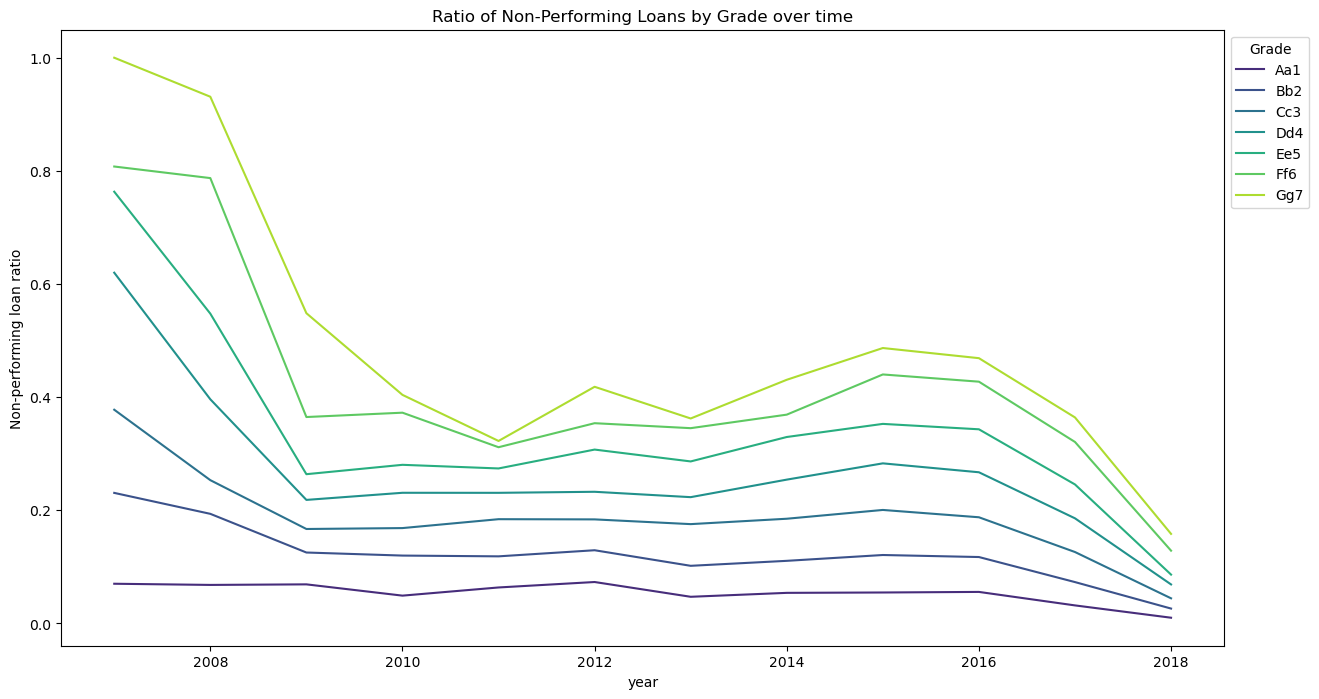

In [49]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_NPL_grade, x='year', y='Non-performing loan ratio', hue='grade', palette='viridis')
plt.title('Ratio of Non-Performing Loans by Grade over time')
plt.legend(title='Grade', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [50]:
# The bank's creditworthiness is evident in the Non-Performing loan ratios 
# across different loan grades, with Aa1 exhibiting the lowest ratio 
# and Gg7 having the highest. 

# Notably, there seems to be a tightening of assessment criteria in 2017, 
# leading to reduced non-performing loans across all grades.

# Furthermore, in 2018, 
# approximately half of the total bank loans were comprised of Aa1 and Bb2 loans, 
# both with Non-Performing loan ratios below 0.03. 

# This indicates a manageable level of risk. 

# Nonetheless, proactive customer follow-up for bad loans is 
# advisable to provide guidance on loan repayment.

In [51]:
# Questions 3 (8’):

# • Can you enhance the credit model? You can leverage on existing credit rating and
# build a model. You need to demonstrate
# o Parameters used
# o Evaluation of the model

# • Are there any data quality issues in the data collected by the bank? Any suggestion?

In [52]:
# Utilizing machine learning can enhance the credit model, 
# leading to improved accuracy in predicting bad loans

df['loan_condition'] = df['loan_condition'].map({'Good Loan': 0, 'Bad Loan': 1})

In [53]:
# Fill missing values
df['emp_length'].fillna('Unknown', inplace=True)

# Map employment lengths to numeric values
emp_length_mapping = {
    '1 year': 2.0,
    '10+ years': 11.0,
    '2 years': 3.0,
    '3 years': 4.0,
    '4 years': 5.0,
    '5 years': 6.0,
    '6 years': 7.0,
    '7 years': 8.0,
    '8 years': 9.0,
    '9 years': 10.0,
    '< 1 year': 1.0,
    'Unknown': 0.0
}

df['emp_length'].replace(emp_length_mapping, inplace=True)

In [54]:
# Map loan status categories
loan_status_mapping = {
    'Late (31-120 days)': 'Late_31_120_days',
    'Late (16-30 days)': 'Late_16_30_days',
    'Does not meet the credit policy. Status:Fully Paid': 'Fully Paid',
    'Does not meet the credit policy. Status:Charged Off': 'Charged Off'
}

df['loan_status'].replace(loan_status_mapping, inplace=True)

In [55]:
# Map home ownership categories
home_ownership_mapping = {
    'NONE': 0,
    'OTHER': 0,
    'ANY': 1,
    'RENT': 1,
    'MORTGAGE': 2,
    'OWN': 3
}

df['home_ownership'].replace(home_ownership_mapping, inplace=True)

In [56]:
df.columns

Index(['loan_condition', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state',
       'inq_last_6mths', 'mths_since_last_record', 'open_acc', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'annual_inc_joint', 'tot_cur_bal', 'open_acc_6m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'inq_last_12m', 'avg_cur_bal',
       'mths_since_recent_inq', 'percent_bc_gt_75', 'total_bal_ex_mort',
       'total_bc_limit', 'disbursement_method', 'loan_condition2_Bad Loan',
       'loan_condition2_Good Loan', 'loan_condition2_Others', 'year', 'month'],
      dtype='object')

In [57]:
df.isnull().sum()

loan_condition                     0
loan_amnt                          0
funded_amnt                        0
term                               0
int_rate                           0
installment                        0
grade                              0
sub_grade                          0
emp_title                     158575
emp_length                         0
home_ownership                     0
annual_inc                         0
verification_status                0
issue_d                            0
loan_status                        0
pymnt_plan                         0
purpose                            0
title                          22195
addr_state                         0
inq_last_6mths                     4
mths_since_last_record       1805055
open_acc                           3
total_acc                          3
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
t

In [58]:
# Rebalance class by undersampling Good Loans
# Class count
class_count_0, class_count_1 = df['loan_condition'].value_counts()

# Separate classes
class_0 = df[df['loan_condition'] == 0]
class_1 = df[df['loan_condition'] == 1]

# Display class shapes
print('Good Loans:', class_0.shape)
print('Bad Loans:', class_1.shape)

Good Loans: (1863565, 53)
Bad Loans: (282181, 53)


Total count of 1 and 0: loan_condition
0    282181
1    282181
Name: count, dtype: int64


<Axes: title={'center': 'Count (Target)'}, xlabel='loan_condition'>

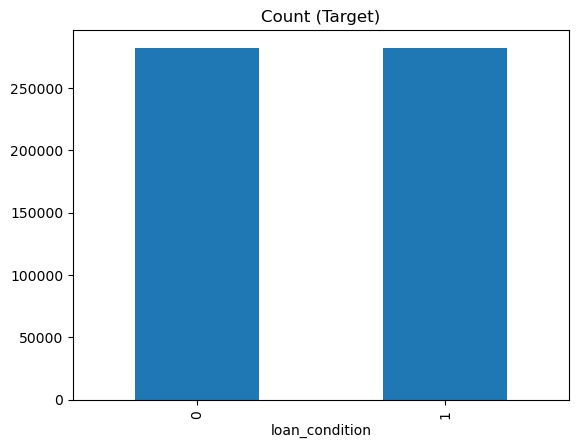

In [59]:
# Undersample Good Loans to balance classes
class_0_under = class_0.sample(class_count_1, random_state=42)

# Concatenate undersampled Good Loans with Bad Loans
df_undersample = pd.concat([class_0_under, class_1], axis=0)

# Display the total count of each class
print("Total count of 1 and 0:", df_undersample['loan_condition'].value_counts())

# Plot the count after undersampling
df_undersample['loan_condition'].value_counts().plot(kind='bar', title='Count (Target)')

In [60]:
df_undersample.columns

Index(['loan_condition', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'purpose', 'title', 'addr_state',
       'inq_last_6mths', 'mths_since_last_record', 'open_acc', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'annual_inc_joint', 'tot_cur_bal', 'open_acc_6m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'inq_last_12m', 'avg_cur_bal',
       'mths_since_recent_inq', 'percent_bc_gt_75', 'total_bal_ex_mort',
       'total_bc_limit', 'disbursement_method', 'loan_condition2_Bad Loan',
       'loan_condition2_Good Loan', 'loan_condition2_Others', 'year', 'month'],
      dtype='object')

In [61]:
# Select variables for modeling
selected_columns = ['year', 'loan_condition', 'loan_amnt', 'term', 'int_rate', 'emp_length', 'grade', 'sub_grade', 'annual_inc', 'open_acc',
                     'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
                     'last_pymnt_amnt', 'tot_cur_bal', 'open_acc_6m', 'max_bal_bc', 'total_rev_hi_lim', 'inq_fi', 'inq_last_12m', 'avg_cur_bal',
                     'mths_since_recent_inq', 'percent_bc_gt_75', 'total_bal_ex_mort', 'total_bc_limit']

df2 = df_undersample[selected_columns]
df_all = df_undersample

In [62]:
# Create dummies for categorical variables in df2
categorical_columns = ['year', 'term', 'emp_length', 'grade', 'sub_grade']
df2 = pd.get_dummies(df2, columns=categorical_columns, drop_first=True)
df2

,loan_condition,loan_amnt,int_rate,annual_inc,open_acc,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
595879,0,35000,9.49,300000.0,23.0,34.0,7700.04,7645.04,32862.580000,32627.85,...,False,False,False,False,False,False,False,False,False,False
294381,0,18000,12.35,75000.0,11.0,28.0,0.00,0.00,21498.010005,21498.01,...,False,False,False,False,False,False,False,False,False,False
173215,0,25000,10.99,80000.0,15.0,32.0,0.00,0.00,29429.536868,29429.54,...,False,False,False,False,False,False,False,False,False,False
236120,0,9600,9.16,60500.0,9.0,12.0,0.00,0.00,11010.813385,11010.81,...,False,False,False,False,False,False,False,False,False,False
590393,0,20950,13.99,90000.0,11.0,32.0,0.00,0.00,28764.270844,28764.27,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147561,1,5150,18.99,19000.0,8.0,10.0,0.00,0.00,4570.390000,4570.39,...,False,False,False,False,False,False,False,False,False,False
2147589,1,10000,12.49,90000.0,7.0,15.0,0.00,0.00,3679.390000,3679.39,...,False,False,False,False,False,False,False,False,False,False
2147594,1,3200,15.05,32000.0,12.0,16.0,0.00,0.00,1338.160000,1338.16,...,False,False,False,False,False,False,False,False,False,False
2147612,1,8500,10.99,29000.0,7.0,16.0,0.00,0.00,6394.330000,6394.33,...,False,False,False,False,False,False,False,False,False,False


In [63]:
# Drop specified columns in df_all
columns_to_drop = ['emp_title', 'issue_d', 'title', 'addr_state', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
df_all.drop(columns=columns_to_drop, inplace=True)
df_all

,loan_condition,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,mths_since_recent_inq,percent_bc_gt_75,total_bal_ex_mort,total_bc_limit,disbursement_method,loan_condition2_Bad Loan,loan_condition2_Good Loan,loan_condition2_Others,year,month
595879,0,35000,35000,36 months,9.49,1120.99,Bb2,B2,11.0,2,...,12.0,62.5,168540.0,45200.0,Cash,False,True,False,2016,9
294381,0,18000,18000,36 months,12.35,600.88,Bb2,B4,2.0,1,...,4.0,75.0,66441.0,17500.0,Cash,False,True,False,2013,8
173215,0,25000,25000,36 months,10.99,818.35,Bb2,B3,0.0,2,...,0.0,100.0,81332.0,20300.0,Cash,False,True,False,2014,8
236120,0,9600,9600,36 months,9.16,306.00,Bb2,B2,5.0,1,...,8.0,0.0,29669.0,30500.0,Cash,False,True,False,2016,2
590393,0,20950,20950,60 months,13.99,487.37,Cc3,C4,10.0,2,...,14.0,66.7,31556.0,7700.0,Cash,False,True,False,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147561,1,5150,5150,36 months,18.99,188.76,Ee5,E1,3.0,1,...,3.0,0.0,26840.0,14800.0,Cash,True,False,False,2014,10
2147589,1,10000,10000,36 months,12.49,334.49,Bb2,B5,2.0,2,...,0.0,83.3,20826.0,22300.0,Cash,True,False,False,2014,5
2147594,1,3200,3200,36 months,15.05,111.01,Cc3,C4,6.0,1,...,9.0,75.0,23911.0,3900.0,Cash,True,False,False,2017,8
2147612,1,8500,8500,36 months,10.99,278.24,Bb2,B4,0.0,1,...,13.0,33.3,7720.0,9800.0,Cash,True,False,False,2015,7


In [64]:
# Create dummies for categorical variables in df_all
categorical_columns = ['year', 'term', 'emp_length', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan', 'purpose', 'application_type', 'disbursement_method']
df_all = pd.get_dummies(df_all, columns=categorical_columns, drop_first=True)
df_all

,loan_condition,loan_amnt,funded_amnt,int_rate,installment,annual_inc,inq_last_6mths,mths_since_last_record,open_acc,total_acc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,application_type_Joint App,disbursement_method_DirectPay
595879,0,35000,35000,9.49,1120.99,300000.0,0.0,NaN,23.0,34.0,...,False,False,False,False,False,False,False,False,False,False
294381,0,18000,18000,12.35,600.88,75000.0,1.0,NaN,11.0,28.0,...,False,False,False,False,False,False,False,False,False,False
173215,0,25000,25000,10.99,818.35,80000.0,2.0,NaN,15.0,32.0,...,False,False,False,False,False,False,False,False,False,False
236120,0,9600,9600,9.16,306.00,60500.0,0.0,NaN,9.0,12.0,...,False,False,False,False,False,False,False,False,False,False
590393,0,20950,20950,13.99,487.37,90000.0,0.0,NaN,11.0,32.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147561,1,5150,5150,18.99,188.76,19000.0,0.0,NaN,8.0,10.0,...,False,False,False,False,False,False,False,False,False,False
2147589,1,10000,10000,12.49,334.49,90000.0,2.0,NaN,7.0,15.0,...,False,False,False,False,False,False,False,False,False,False
2147594,1,3200,3200,15.05,111.01,32000.0,0.0,NaN,12.0,16.0,...,False,False,False,False,False,False,False,False,False,False
2147612,1,8500,8500,10.99,278.24,29000.0,0.0,NaN,7.0,16.0,...,False,False,False,False,False,False,False,False,False,False


In [65]:
# Train-Test Split

# Set X and y for df2
y2 = df2['loan_condition']
X2 = df2.drop(columns=['loan_condition'])

# Set X and y for df_all
y_all = df_all['loan_condition']
X_all = df_all.drop(columns=['loan_condition'])

In [66]:
X2

,loan_amnt,int_rate,annual_inc,open_acc,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,...,sub_grade_F1,sub_grade_F2,sub_grade_F3,sub_grade_F4,sub_grade_F5,sub_grade_G1,sub_grade_G2,sub_grade_G3,sub_grade_G4,sub_grade_G5
595879,35000,9.49,300000.0,23.0,34.0,7700.04,7645.04,32862.580000,32627.85,27299.96,...,False,False,False,False,False,False,False,False,False,False
294381,18000,12.35,75000.0,11.0,28.0,0.00,0.00,21498.010005,21498.01,18000.00,...,False,False,False,False,False,False,False,False,False,False
173215,25000,10.99,80000.0,15.0,32.0,0.00,0.00,29429.536868,29429.54,25000.00,...,False,False,False,False,False,False,False,False,False,False
236120,9600,9.16,60500.0,9.0,12.0,0.00,0.00,11010.813385,11010.81,9600.00,...,False,False,False,False,False,False,False,False,False,False
590393,20950,13.99,90000.0,11.0,32.0,0.00,0.00,28764.270844,28764.27,20950.00,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2147561,5150,18.99,19000.0,8.0,10.0,0.00,0.00,4570.390000,4570.39,2948.03,...,False,False,False,False,False,False,False,False,False,False
2147589,10000,12.49,90000.0,7.0,15.0,0.00,0.00,3679.390000,3679.39,2670.58,...,False,False,False,False,False,False,False,False,False,False
2147594,3200,15.05,32000.0,12.0,16.0,0.00,0.00,1338.160000,1338.16,670.85,...,False,False,False,False,False,False,False,False,False,False
2147612,8500,10.99,29000.0,7.0,16.0,0.00,0.00,6394.330000,6394.33,5104.57,...,False,False,False,False,False,False,False,False,False,False


In [67]:
X_all.columns

Index(['loan_amnt', 'funded_amnt', 'int_rate', 'installment', 'annual_inc',
       'inq_last_6mths', 'mths_since_last_record', 'open_acc', 'total_acc',
       'out_prncp',
       ...
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'application_type_Joint App',
       'disbursement_method_DirectPay'],
      dtype='object', length=123)

In [66]:
seed = 2023

In [67]:
# Split X2 data with 20% cross-validation for df2
X2_train, X2_cv, y2_train, y2_cv = train_test_split(X2, y2, test_size=0.2, random_state=seed)
print(f"Training set: X2_train shape - {X2_train.shape}, y2_train shape - {y2_train.shape}")
print(f"Cross-validation set: X2_cv shape - {X2_cv.shape}, y2_cv shape - {y2_cv.shape}")

Training set: X2_train shape - (451489, 86), y2_train shape - (451489,)
Cross-validation set: X2_cv shape - (112873, 86), y2_cv shape - (112873,)


In [68]:
# Split X_all data with 20% cross-validation for df_all
X_all_train, X_all_cv, y_all_train, y_all_cv = train_test_split(X_all, y_all, test_size=0.2, random_state=seed)
print(f"Training set: X_all_train shape - {X_all_train.shape}, y_all_train shape - {y_all_train.shape}")
print(f"Cross-validation set: X_all_cv shape - {X_all_cv.shape}, y_all_cv shape - {y_all_cv.shape}")

Training set: X_all_train shape - (451489, 123), y_all_train shape - (451489,)
Cross-validation set: X_all_cv shape - (112873, 123), y_all_cv shape - (112873,)


In [69]:
%config Completer.use_jedi = False
%config IPCompleter.greedy=True

In [70]:
# LightGBM

import time
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Assuming X2_train, y2_train, X2_cv, y2_cv are already defined

# Downsample the training set
desired_size = 1000
X2_train_downsampled, y2_train_downsampled = resample(X2_train, y2_train, n_samples=desired_size, random_state=seed)

# Downsample the validation set
X2_cv_downsampled, y2_cv_downsampled = resample(X2_cv, y2_cv, n_samples=desired_size, random_state=seed)

# Build LightGBM classifier
lgbmodel = lgb.LGBMClassifier()

# Measure the start time
start_time = time.time()

# Fit the model with downsampled training data
lgbmodel.fit(X2_train_downsampled, y2_train_downsampled)

# Measure the end time
end_time = time.time()

# Calculate and print the training time
training_time = end_time - start_time
print(f"Training time: {training_time} seconds")

# Predict the target on downsampled training dataset
predict_train = lgbmodel.predict(X2_train_downsampled)

# Accuracy Score on downsampled training dataset
accuracy_train = accuracy_score(y2_train_downsampled, predict_train)
print('\nAccuracy_score on downsampled train dataset : ', accuracy_train)

# Predict the target on downsampled validation dataset
predict_test = lgbmodel.predict(X2_cv_downsampled)

# Accuracy Score on downsampled validation dataset
accuracy_test = accuracy_score(y2_cv_downsampled, predict_test)
print('\nAccuracy_score on downsampled test dataset : ', accuracy_test)

# View the Classification report
print(classification_report(y2_cv_downsampled, predict_test))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 498, number of negative: 502
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3766
[LightGBM] [Info] Number of data points in the train set: 1000, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498000 -> initscore=-0.008000
[LightGBM] [Info] Start training from score -0.008000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [ ]:
# The LightGBM model demonstrates a recall rate of 86%, 
# a metric of greater significance than its 96% precision. 

# This prioritization arises from the criticality of 
# predicting false negatives – instances where customers are forecasted as non-defaulters but,
# in reality, default. 

# Such accuracy holds paramount importance in effective risk management.

#Question 4 will be on A0163058E_assignment1-xgboost-final.ipynb 